1. pop_density 변수를 factor형 변수로 변환하고, pop_density 별 revenues의 평균 차이가 있는 지 통계분석을 시행하여 결과를 해석하시오. 만약 대립가설이 채택된다면 사후분석을 실시하고 결과를 해석하시오.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('../data/bike_marketing.csv')
df.head()

,company_num,google_adwords,facebook,twitter,marketing_total,revenues,employees,pop_density
0,1,65.66,47.86,52.46,166,39.26,5,High
1,2,39.10,55.20,77.40,172,38.90,7,Medium
2,3,174.81,52.01,68.01,295,49.51,11,Medium
3,4,34.36,61.96,86.86,183,40.56,7,High
4,5,78.21,40.91,30.41,150,40.21,9,Low


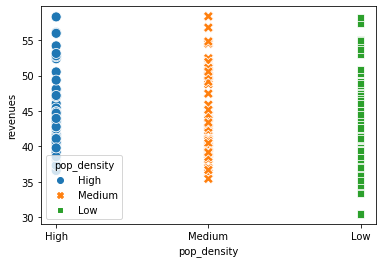

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='pop_density', y = 'revenues', hue = 'pop_density', style='pop_density',
                s=100, data =df)
plt.show()

- 귀무가설 : 세가지 인구 밀도에 대해 revenues의 평균은 모두 같음
- 대립가설 : 세가지 인구 밀도에 대해 revenues의 평균값에는 차이가 있음

In [8]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('revenues ~ C(pop_density)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(pop_density),2.0,41.731283,20.865641,0.609944,0.544573
Residual,169.0,5781.337568,34.209098,NaN,NaN


SSA의 자유도는 2 (집단의 수 - 1), SST의 자유도는 169(관측값의 수 - 집단의 수)임을 확인할 수 있다. 분산분석 결과, p-value값이 0.05보다 크기때문에 귀무가설을 채택한다. 따라서 세가지 인구밀도에 대해 revenues의 평균의 차이는 통계적으로 유의한 차이를 가지고 있다고 할 수 없다.

2. google_adwords, facebook, twitter, marketing_total, employees가 revenues에 영향을 미치는 지 알아보는 회귀분석을 전진 선택법을 사용하여 수행하고 결과를 해석하시오.

In [19]:
import statsmodels.api as sm

model = sm.OLS.from_formula('revenues ~ google_adwords + facebook + twitter + marketing_total + employees', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               revenues   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           1.57e-72
Time:                        01:55:31   Log-Likelihood:                -369.26
No. Observations:                 172   AIC:                             750.5
Df Residuals:                     166   BIC:                             769.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          28.4433      0.596     47.706      0.000      27.266      29.621
google_adwords      1.2110      0.571      2.122      0.035       0.084       2.338
facebook            1.3464      0.571      2.356      0.020       0.218       2.474
twitter             1.1724      0.571      2.052      0.042       0.045       2.300
marketing_total    -1.1696      0.571     -2.049      0.042      -2.297      -0.043
employees           0.3865      0.104      3.708      0.000       0.181       0.592
==============================================================================
Omnibus:                        3.945   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                3.974
Skew:                          -0.341   Prob(JB):                        0.137
Kurtosis:                       2.702   Cond. No.                     2.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3. 전진선택법을 사용해 변수를 선택한 후 새롭게 생성한 회귀모형에 대한 잔차분석을 수행하고 결과를 해석하시오.

Dubin- Watson

In [20]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

2.1113783728609468

더빈 왓슨 검정 결과 값이 2에 가깝기 때문에 독립성 가정 만족

Shapiro-Wilk 검정

In [21]:
shapiro_test = stats.shapiro(model.resid)
shapiro_test

ShapiroResult(statistic=0.9865776300430298, pvalue=0.09909190982580185)

p-value값이 0.05보다 크기 때문에 귀무가설 기각 -> 정규분포를 따름

잔차의 등분산성

c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


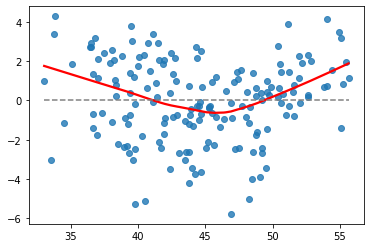

In [24]:
fitted = model.predict(df)
residual = df['revenues'] - fitted

sns.regplot(fitted, residual, lowess=True, line_kws = {'color':'red'})
plt.plot([fitted.min(), fitted.max()], [0,0], '--', color='grey')

- 잔차 vs 예측값의 분포 (등분산성 가정 확인)
- 그래프의 기울기를 나타내는 빨간 선이 포물선의 성향을 띄기 때문에 잔차는 평균인 0을 중심으로 고르게 분포한다고 할 수 없다.

qqplot (정규성 가정)

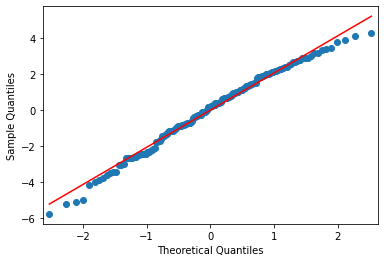

In [25]:
from statsmodels.graphics.gofplots import qqplot
qqplot(model.resid, line='s')
plt.show()

직선위에 그래프의 점들이 주로 위치하고 있으므로 정규성을 만족한다고 판단

scale location (등분산성 가정 확인)

c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

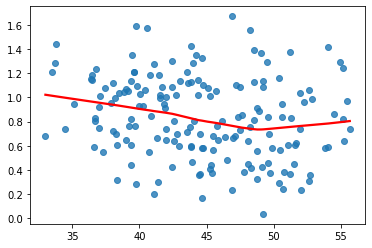

In [27]:
sr = stats.zscore(residual)
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color':'red'})

- 빨간선의 기울기가 0에 가까워야 하지만, fitted_value가 커질수록 다소 변화하는 경향을 보인다. 이렇게 빨간선의 기울기가 0에서 떨어진 점이 있다면 해당 점에서는 표준화 잔차가 큼을 의미하고, 회귀직선이 y값을 잘 적합하지 못함을 의미한다. 또한 해당 점들은 이상치일 가능성이 있다. 

극단값

In [28]:
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(model).cooks_distance
cd.sort_values(ascending=False).head()

110    0.061089
152    0.049946
106    0.046469
108    0.045954
114    0.044333
dtype: float64